Notebook elaborado para apresentar as características globais do campo geomagnético.
Criado para a disciplina Geofísica I da Universidade Federal de Uberlândia.
O uso e a reprodução são livres para fins educacionais, pede-se apenas a citação da fonte.

[![License: GPL v3](https://img.shields.io/badge/License-GPLv3-blue.svg)](https://www.gnu.org/licenses/gpl-3.0)

Os dados utilizados nesta demonstração foram calculados usando o 13ª geração do Campo Geomagnético de Referência Internacional ([*International Geomagnetic Reference Field* - IGRF](https://www.ngdc.noaa.gov/IAGA/vmod/igrf.html)) utilizando o programa Geomag 7.0 (disponível para [Windows](https://www.ngdc.noaa.gov/IAGA/vmod/geomag70_windows.zip), [Linux](https://www.ngdc.noaa.gov/IAGA/vmod/geomag70_linux.tar.gz) e com código disponível nas linguagens [Fortran](https://www.ngdc.noaa.gov/IAGA/vmod/igrf13.f) e [Python](https://www.ngdc.noaa.gov/IAGA/vmod/pyIGRF.zip)).

Prof. Dr. Emerson Rodrigo Almeida<br>
Universidade Federal de Uberlândia<br>
Instituto de Geografia - Curso de Geologia<br>
emerson.almeida@ufu.br<br>



<p>&nbsp;</p>
Última modificação: 06/03/2021

# Instruções iniciais

Neste notebook você irá observar as componentes que descrevem o campo geomagnético. Este notebook permitirá observar a intensidade, a inclinação e a declinação do campo em diferentes épocas, entre os anos de 1900 e 2020 a intervalos de 10 anos. Para isto leia atentamente as instruções apresentadas antes de cada célula e execute-as uma a uma, para acompanhar o processo corretamente.

Não se preocupe em compreender o código em si, não é obrigatório que você conheça a programação para obter e interpretar os resultados da demonstração. Mesmo assim, sinta-se livre caso queira perguntar qualquer coisa para aprender mais sobre o código e sua elaboração.

<p>&nbsp;</p>

### Passo 01 - Preparação

Primeiramente vamos preparar o notebook com os módulos e funções que precisaremos no decorrer da demonstração. A célula abaixo contém as funções utilizadas nos cálculos e as funções utilizadas para gerar as figuras. Execute-a uma vez antes de executar qualquer outra parte do código e **não altere nada no código apresentado na célula** para não criar problemas na execução do código.

Você pode executar o código na célula clicando sobre ela e em seguida clicando no botão **RUN** na barra do Jupyter Notebook ou pressionando as teclas **SHIFT+ENTER** no seu teclado.

<p>&nbsp;</p>

**Importante!** Nem todas as células irão retornar algum tipo de mensagem ou figura após a execução. Isto é normal e não significa que a execução tenha falhado. Perceba o símbolo **In [   ]:** próximo ao canto superior esquerdo de cada célula. Ao iniciar a execução de uma delas você verá um asterisco ($*$) aparecer dentro dos colchetes. Você saberá que a execução ocorreu sem problemas quando o $*$ dentro dos colchetes for substituído por um número e nenhuma mensagem de erro aparecer abaixo da célula executada. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


def le_componentes(d, a):
    
    """
    d : array 2D com os dados calculados com o Geomag 7.0 (https://www.ngdc.noaa.gov/geomag/models.shtml  ou
        https://www.ngdc.noaa.gov/geomag/data/geomag/geomag70_windows.zip)
        As colunas são organizadas em: data / lat / long / F / Dec / Inc 

    a : ano para o qual serão extraídos os dados
    """
    
    lat = np.unique(d[d[:, 0]==a, 1])
    lon = np.unique(d[d[:, 0]==a, 2])
    F = 1e-3 * d[d[:, 0]==a, 3].reshape(len(lon), len(lat)).T
    D = d[d[:, 0]==a, 4].reshape(len(lon), len(lat)).T
    I = d[d[:, 0]==a, 5].reshape(len(lon), len(lat)).T
    
    return lat, lon, F, D, I


def plota_componentes(y, x, F, D, I, a):
    fig = plt.figure(figsize=(13, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    z_filled = plt.contourf(x, y, F, 20, transform=ccrs.PlateCarree(), cmap='RdBu_r', alpha=0.5)
    z_linhas = plt.contour(x, y, F, levels=z_filled.levels, colors=['black'], transform=ccrs.PlateCarree())
    ax.clabel(z_linhas, colors=['black'], manual=False, inline=True, fmt=' {:.0f} '.format)
    ax.set_global()
    ax.coastlines(resolution='50m', alpha=1)
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    ax.set_title('Intensidade magnética no ano ' + str(a) + ' (em $\mu$T)', fontsize=14)
    plt.tight_layout()
    plt.show()

    fig = plt.figure(figsize=(13, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    z_filled = plt.contourf(x, y, I, 20, transform=ccrs.PlateCarree(), cmap='RdBu_r', alpha=0.5)
    z_linhas = plt.contour(x, y, I, levels=z_filled.levels, colors=['black'], transform=ccrs.PlateCarree())
    ax.clabel(z_linhas, colors=['black'], manual=False, inline=True, fmt=' {:.0f} '.format)
    ax.set_global()
    ax.coastlines(resolution='50m', alpha=1)
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    ax.set_title('Inclinação magnética no ano ' + str(a) + ' (em graus)', fontsize=14)
    plt.tight_layout()
    plt.show()

    fig = plt.figure(figsize=(13, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    z_filled = plt.contourf(x, y, D, 41, transform=ccrs.PlateCarree(), cmap='RdBu_r', alpha=0.5)
    z_linhas = plt.contour(x, y, D, levels=z_filled.levels, colors=['black'], transform=ccrs.PlateCarree(), alpha=0.85)
    ax.clabel(z_linhas, colors=['black'], manual=False, inline=True, fmt=' {:.0f} '.format)
    ax.set_global()
    ax.coastlines(resolution='50m', alpha=1)
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    ax.set_title('Declinação magnética no ano ' + str(a) + ' (em graus)', fontsize=14)
    plt.tight_layout()
    plt.show()

### Passo 02 - Carregar os dados

Esta demonstração utilizará dados carregados a partir de um arquivo ASCII com os dados do campo geomagnético já calculados pelo programa Geomag 7.0 utilizando os coeficientes do IGRF-13.

Execute a célula abaixo para carregar este arquivo.

In [2]:
dados = np.loadtxt('IGRF.txt')

### Passo 03 - Definir uma época

Agora será necessário definir a data para a qual você quer visualizar as componentes do campo geomagnético.

Execute a célula abaixo para definir o ano de 2020.

In [3]:
ano = 2020

### Passo 04 - Visualização do campo geomagnético

Execute a célula abaixo para visualizar o comportamento do campo geomagnético na data definida no **Passo 03**.

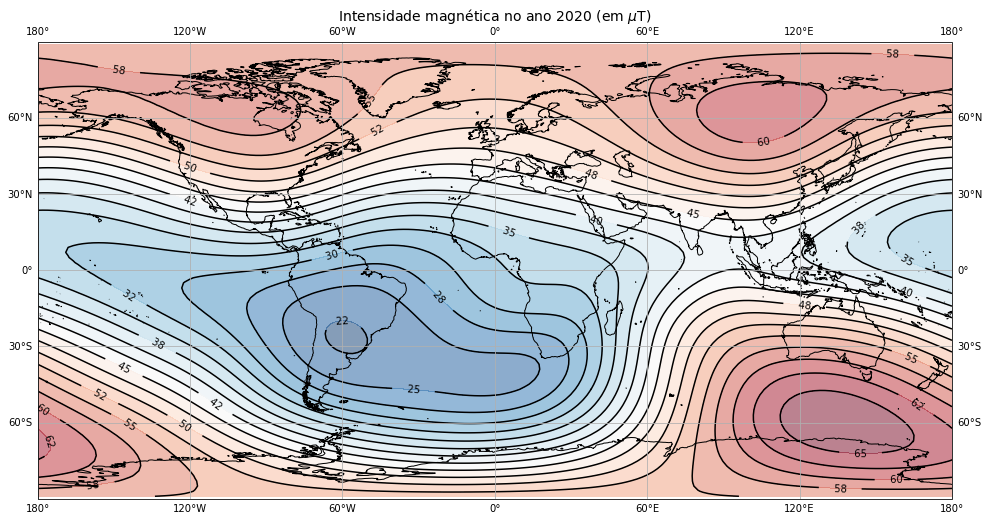

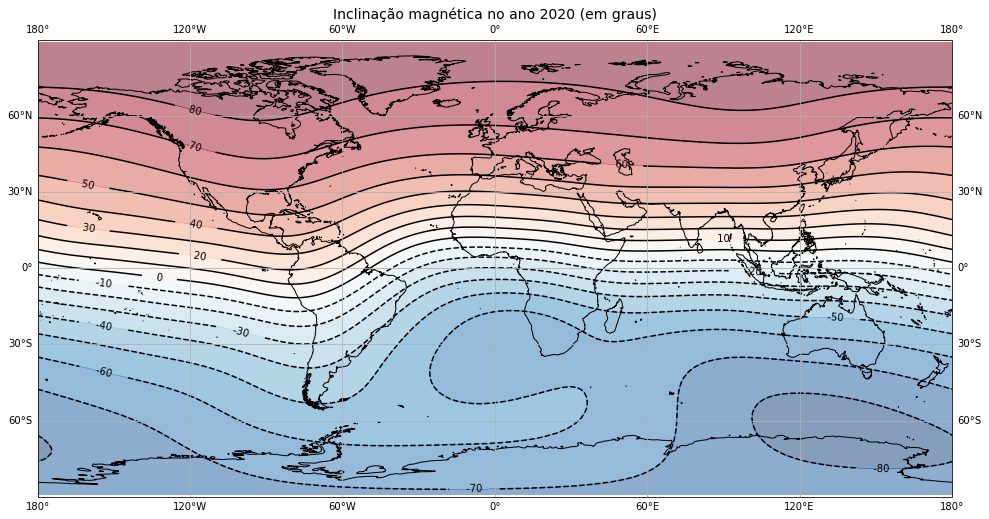

In [ ]:
latitude, longitude, intensidade, declinacao, inclinacao = le_componentes(dados, ano)
plota_componentes(latitude, longitude, intensidade, declinacao, inclinacao, ano)

Identifique os locais onde a intensidade do campo atinge seu valor mínimo e seu valor máximo. Identifique o equador magnpetico. Identifique os locais onde não há diferença entre a direção do norte geográfico e a direção do norte magnético. Agora modifique o ano no **Passo 03** para uma data qualquer no intervalo \[1900, 1910, 1920, ..., 2000, 2010, 2020\] e identifique estas características novamente. O que você observa?